# LOGISTIC REGRESSION - Digits

Using logistic regression to identify images

In [1]:
# Importing libraries and their associated methods

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.datasets import load_digits
from sklearn import metrics
from sklearn.model_selection import train_test_split


%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
digits = load_digits()

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [17]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [18]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
print('image data shape:',digits.data.shape)
print('label data shape:',digits.target.shape)

image data shape: (1797, 64)
label data shape: (1797,)


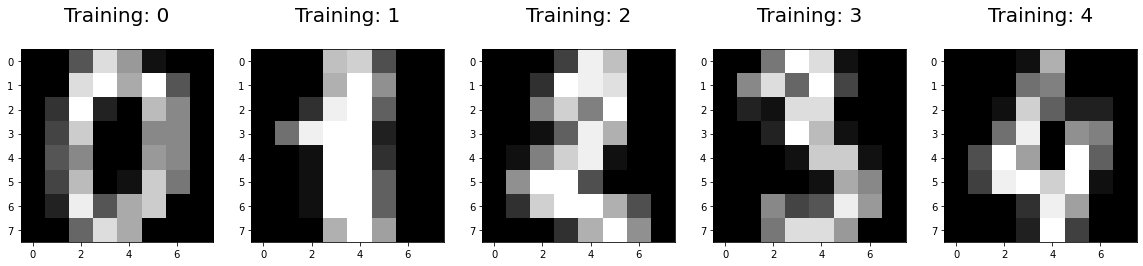

In [25]:
# displaying some images
plt.figure(figsize=(20,4))
for index,(image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [26]:
#splitting our dataset
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [27]:
# importing the logistic regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [40]:
score = metrics.accuracy_score(y_test,y_predict)

In [34]:
# making predictions
model.predict(X_test[0].reshape(1,-1))

array([4])

In [35]:
model.predict(X_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [36]:
#confusion matrix
cm = metrics.confusion_matrix(y_test,y_predict)
cm

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  3,  1],
       [ 0,  1,  0,  0,  1, 44,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  1, 30]], dtype=int64)

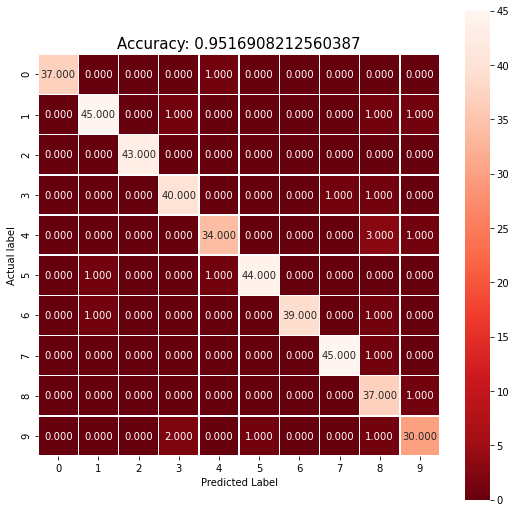

In [42]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Reds_r")
plt.ylabel('Actual label')
plt.xlabel('Predicted Label')
accuracy = 'Accuracy: {}'.format(score)
plt.title(accuracy,size=15);

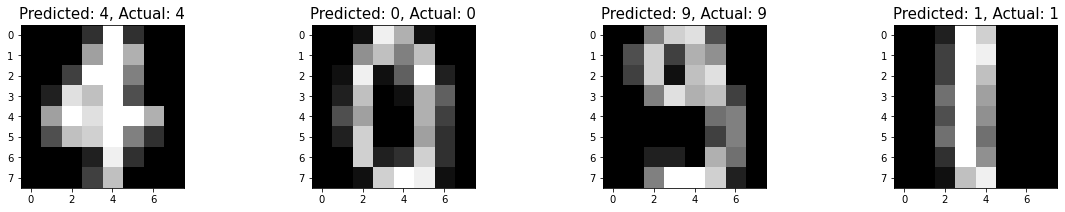

In [44]:
index = 0
clfI = []
for predict, actual in zip(y_predict,y_test):
    if predict==actual:
        clfI.append(index)
    index +=1
    
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(clfI[0:4]):
    plt.subplot(1,4, plotIndex +1)
    plt.imshow(np.reshape(X_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(y_predict[wrong],y_test[wrong]), fontsize=15)